In [2]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

In [3]:
########################
##### Load Dataset #####
########################

df = pd.read_csv("final_data.csv", index_col=0)

In [4]:
#############################################
##### Feature selection and engineering #####
#############################################

X_numeric_cols = ['telecommuting', 'has_company_logo', 'has_questions', 'location_has_non_latin',
'description_has_non_latin', 'requirements_has_non_latin', 'has_requirements',
'has_location', 'has_location_details']
X_text_cols = ['title', 'description_and_requirements']
X_cat_cols = ['country_state']

# location, description, requirements, country will be dropped.
y_col = ['fraudulent']

df2 = df[X_numeric_cols+X_text_cols+X_cat_cols+y_col].dropna()

X = df2[X_numeric_cols+X_text_cols+X_cat_cols]
y = df2[y_col].values.ravel()

In [5]:
##############################
##### Data preprocessing #####
##############################

# Create and fit TfidfVectorizer
preprocessor_text = ColumnTransformer(
    transformers=[
        ("title_vectorized", TfidfVectorizer(max_features=5000, stop_words='english'), "title"),
        ("dnr_vectorized", TfidfVectorizer(max_features=5000, stop_words='english'), "description_and_requirements"),
        ("cat_encoded", OneHotEncoder(max_categories=None, handle_unknown='ignore', sparse_output=True), X_cat_cols)
    ],
    remainder='drop'
)

preprocessor_all = ColumnTransformer(
    transformers=[
        ("title_vectorized", TfidfVectorizer(max_features=5000, stop_words='english'), "title"),
        ("dnr_vectorized", TfidfVectorizer(max_features=5000, stop_words='english'), "description_and_requirements"),
        ("num_scaled", MinMaxScaler(), X_numeric_cols),
        ("cat_encoded", OneHotEncoder(max_categories=None, handle_unknown='ignore', sparse_output=True), X_cat_cols)
    ],
    remainder='drop'
)

X_text_processed = preprocessor_text.fit_transform(X)
X_all_processed = preprocessor_all.fit_transform(X)

In [6]:
#######################
##### Load Models #####
#######################

import pickle

model_dict_80 = {}
model_dict_90 = {}

title_lst = ["text_pca", "all_pca", "text_svd", "all_svd"]

for title in title_lst:
    filename = f"models/unsupervised_{title}_80.pkl"
    with open(filename, 'rb') as file:
        model_dict_80[title] = pickle.load(file)

for title in title_lst:
    filename = f"models/unsupervised_{title}_90.pkl"
    with open(filename, 'rb') as file:
        model_dict_90[title] = pickle.load(file)

In [7]:
########################
##### Load outputs #####
########################

output_dict_80 = {}
output_dict_80["text_pca"] = model_dict_80["text_pca"].transform(X_text_processed)
output_dict_80["all_pca"] = model_dict_80["all_pca"].transform(X_all_processed)
output_dict_80["text_svd"] = model_dict_80["text_svd"].transform(X_text_processed)
output_dict_80["all_svd"] = model_dict_80["all_svd"].transform(X_all_processed)

output_dict_90 = {}
output_dict_90["text_pca"] = model_dict_90["text_pca"].transform(X_text_processed)
output_dict_90["all_pca"] = model_dict_90["all_pca"].transform(X_all_processed)
output_dict_90["text_svd"] = model_dict_90["text_svd"].transform(X_text_processed)
output_dict_90["all_svd"] = model_dict_90["all_svd"].transform(X_all_processed)

/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/decomposition/_base.py:155: RuntimeWarning: divide by zero encountered in matmul
  X_transformed -= xp.reshape(self.mean_, (1, -1)) @ self.components_.T
/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/decomposition/_base.py:155: RuntimeWarning: overflow encountered in matmul
  X_transformed -= xp.reshape(self.mean_, (1, -1)) @ self.components_.T
/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/decomposition/_base.py:155: RuntimeWarning: invalid value encountered in matmul
  X_transformed -= xp.reshape(self.mean_, (1, -1)) @ self.components_.T


In [8]:
scaler = MinMaxScaler()
X_nontext = scaler.fit_transform(df2[X_numeric_cols])

# Combine numeric and text features
output_dict_80["combined_pca"] = np.hstack([output_dict_80["text_pca"], X_nontext])
output_dict_80["combined_svd"] = np.hstack([output_dict_80["text_svd"], X_nontext])
output_dict_90["combined_pca"] = np.hstack([output_dict_90["text_pca"], X_nontext])
output_dict_90["combined_svd"] = np.hstack([output_dict_90["text_svd"], X_nontext])

/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul


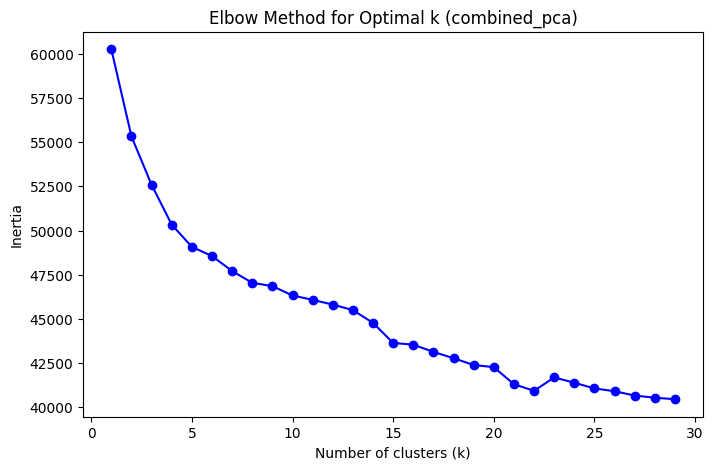

/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul


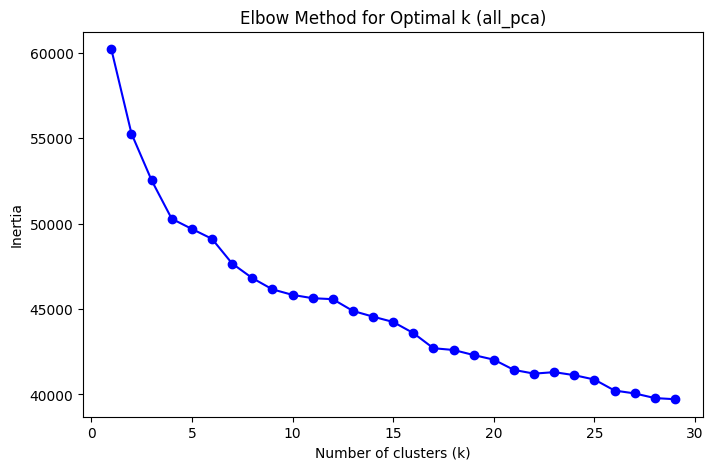

/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul


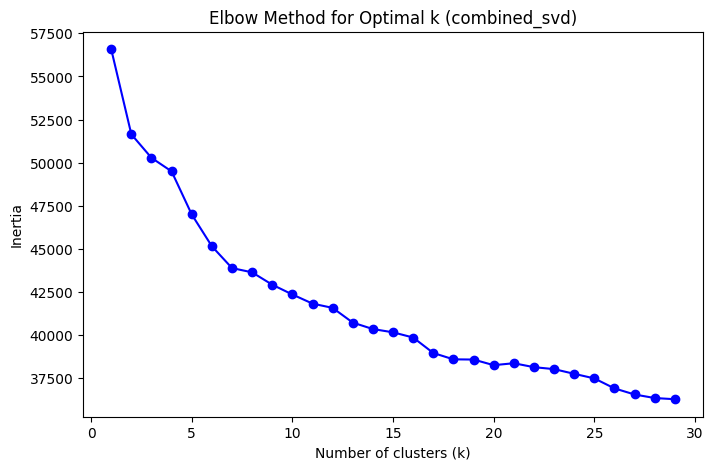

/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul


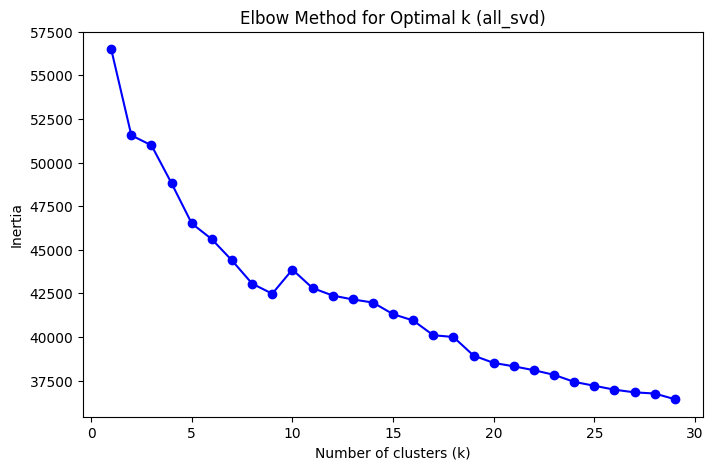

In [9]:
K = range(1, 30)

title_lst = ["combined_pca", "all_pca", "combined_svd", "all_svd"]
for title in title_lst:
    distortion = []
    for k in K: 
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(output_dict_80[title])
        distortion.append(kmeans.inertia_)      #this will store the sum of squared distances (also called distortion (per point)/inertia (all points)).

    plt.figure(figsize=(8, 5))
    plt.plot(K, distortion, 'bo-')
    plt.title(f"Elbow Method for Optimal k ({title})")
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.show()

In [57]:
df3 = df2[['title', 'fraudulent']]
optimal_k = 8
title_lst = ["combined_pca", "all_pca", "combined_svd", "all_svd"]
for title in title_lst:
    # 80% threshold
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    kmeans.fit(output_dict_80[title])
    df3[f"clusters_{title}_80"] = kmeans.fit_predict(output_dict_80[title])
    # 90% threshold
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    kmeans.fit(output_dict_90[title])
    df3[f"clusters_{title}_90"] = kmeans.fit_predict(output_dict_90[title])

/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/woojungyi/Library/Python/3.12/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in matmul


In [58]:
############################
##### Analuze clusters #####
############################

col_lst = df3.columns.to_list()[2:]

summary = {}
K = 8
for col in col_lst:
    counts = {}
    for k in range(K):
        pos_cnt = df3[(df3[col] == k) & (df3['fraudulent'])][col].count()
        neg_cnt = df3[(df3[col] == k) & (~df3['fraudulent'])][col].count()
        total_cnt = df3[(df3[col] == k)][col].count()
        counts[k] = [pos_cnt/total_cnt, neg_cnt/total_cnt, total_cnt] 
    summary[col] = counts

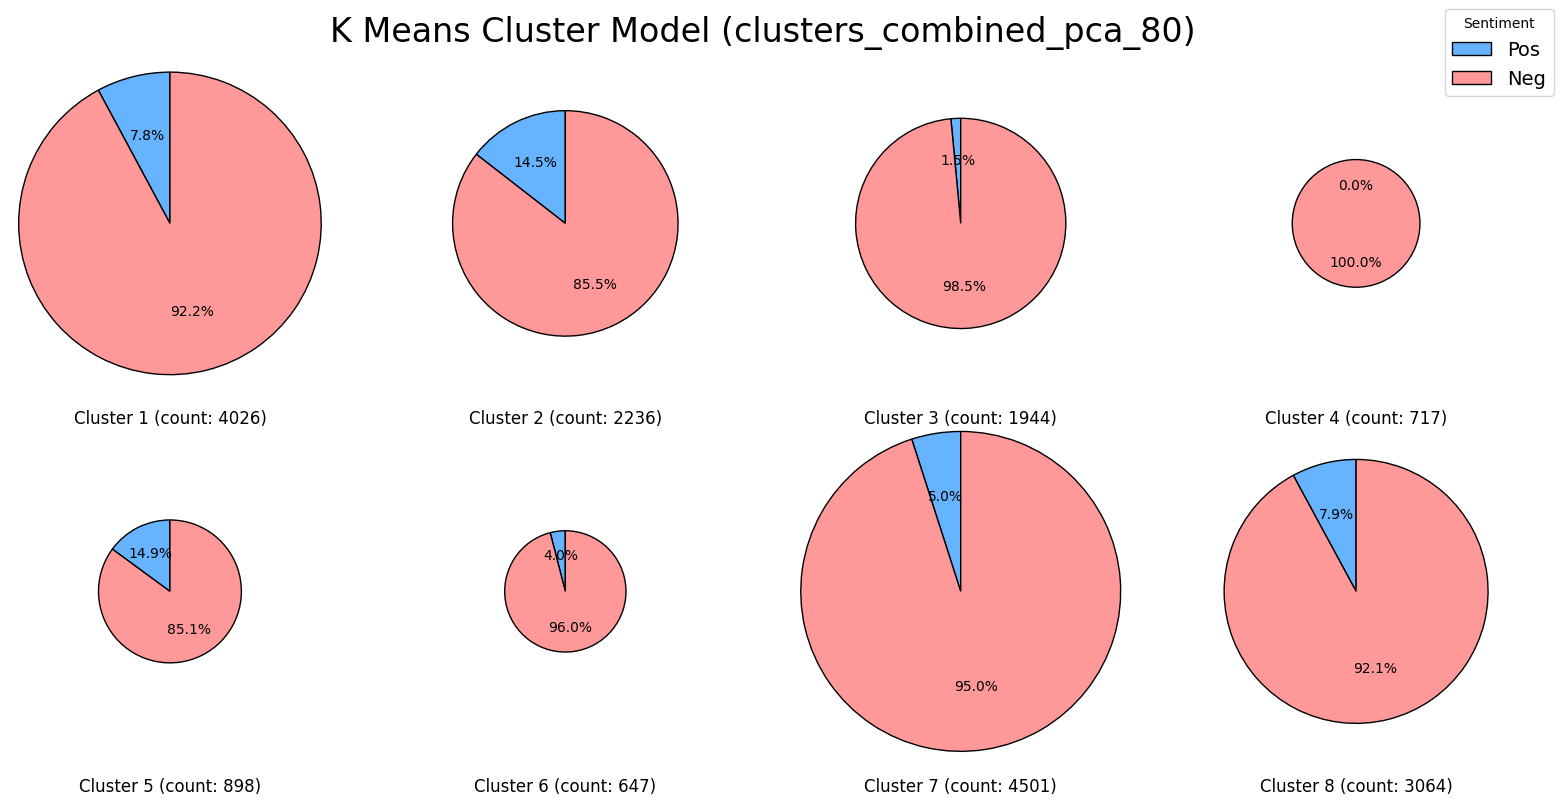

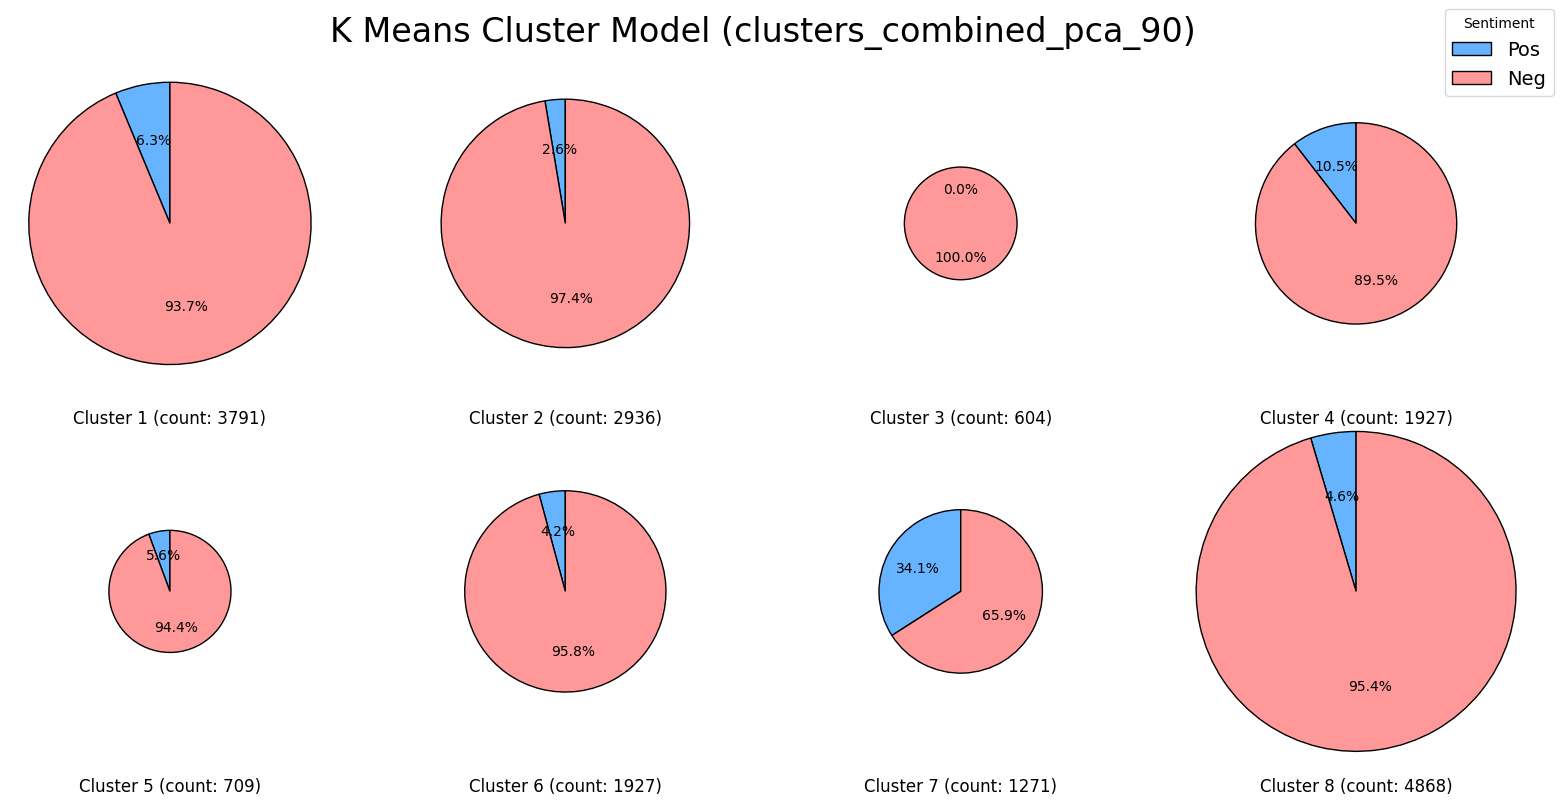

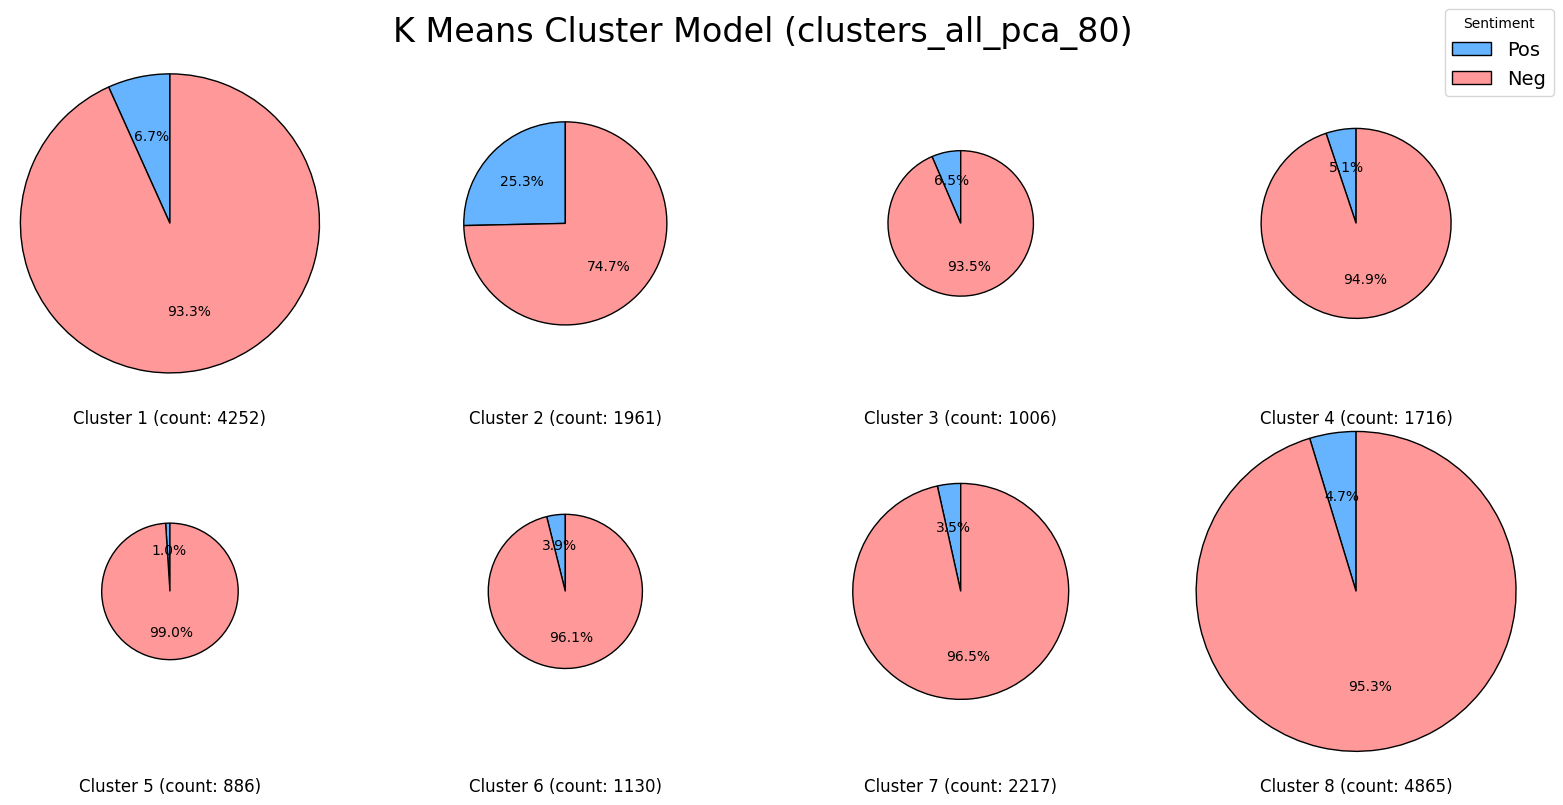

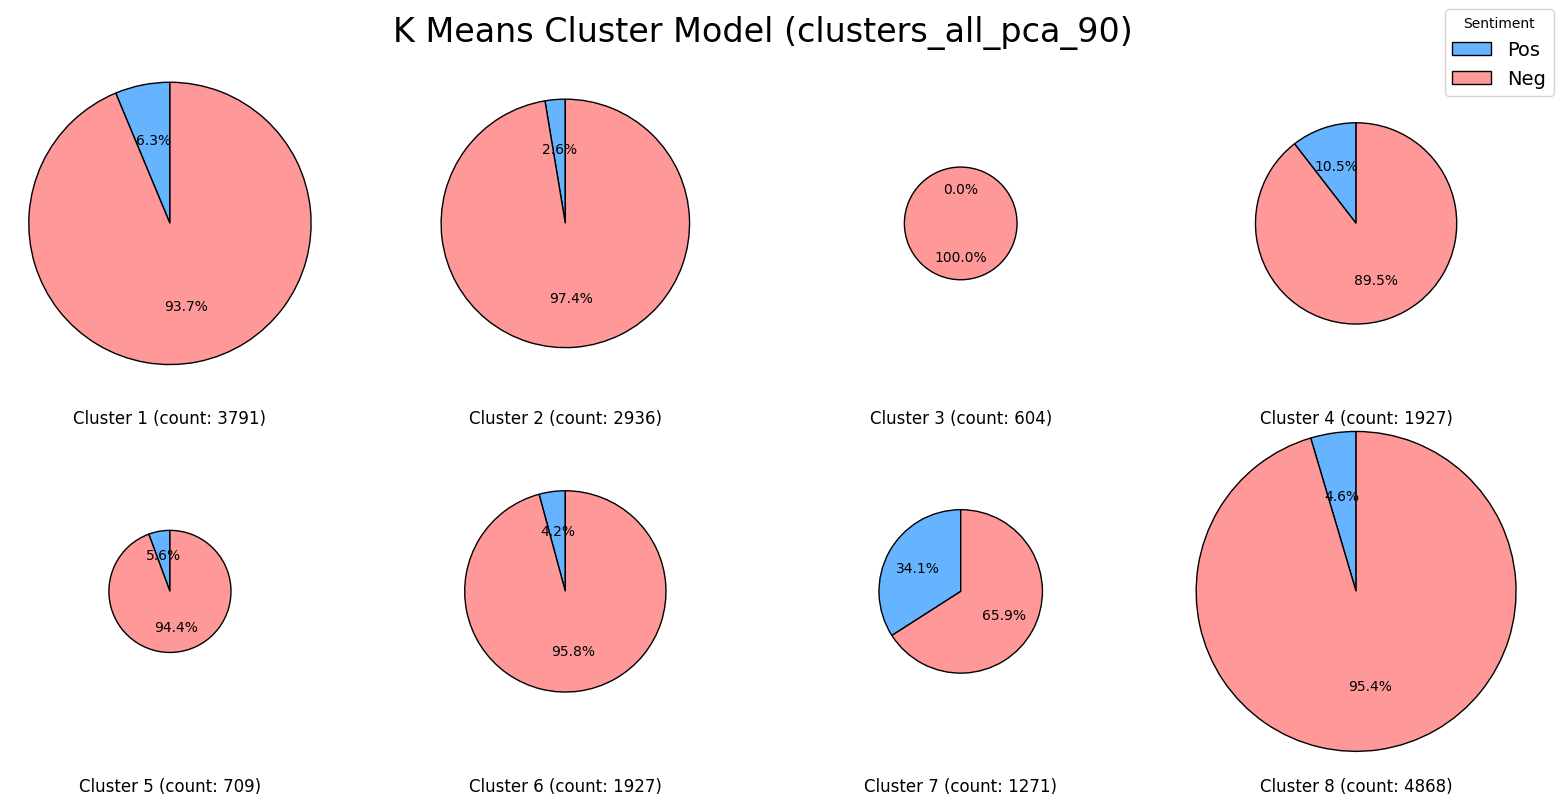

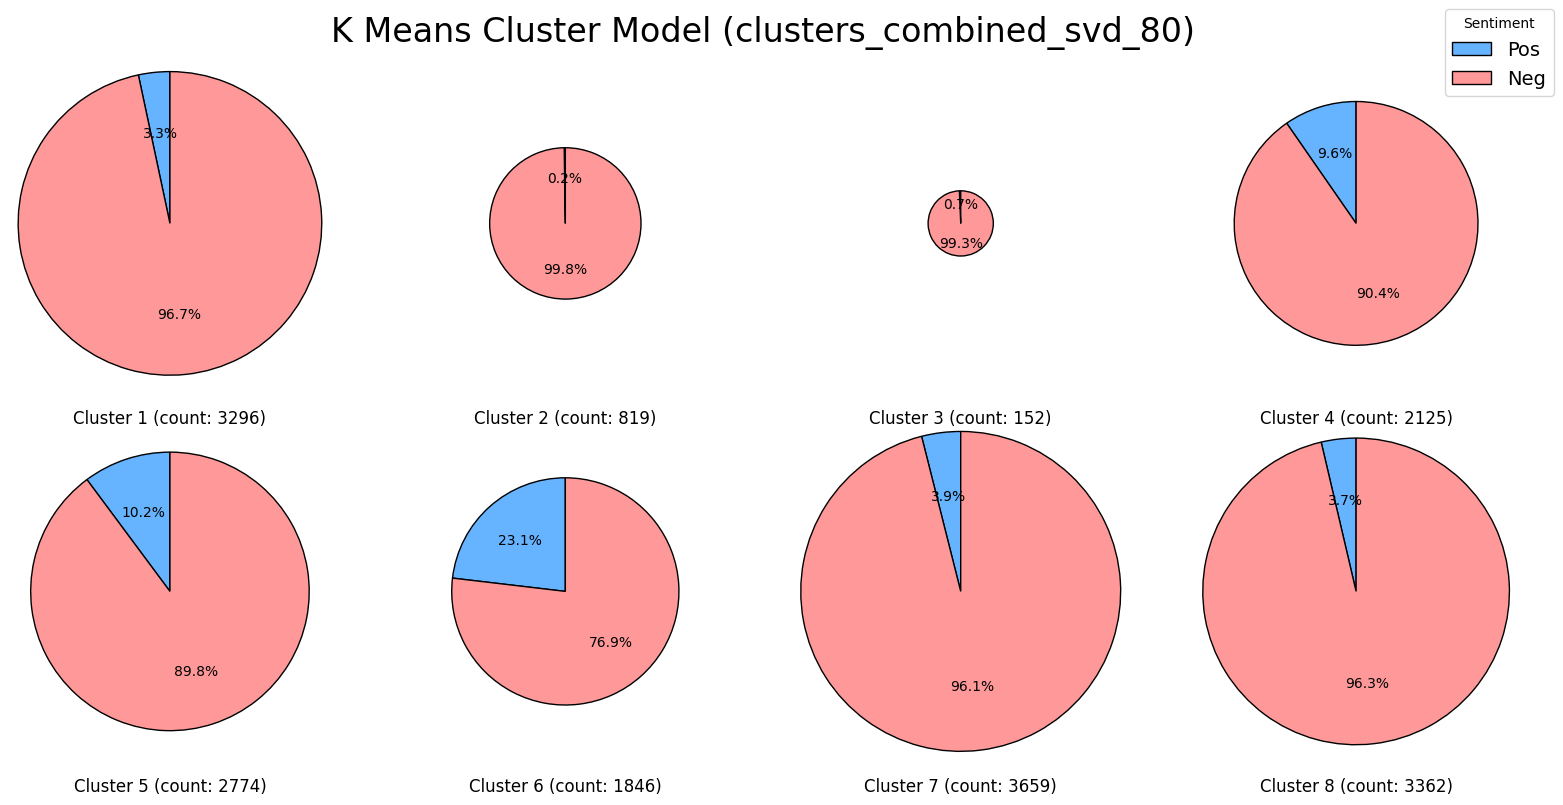

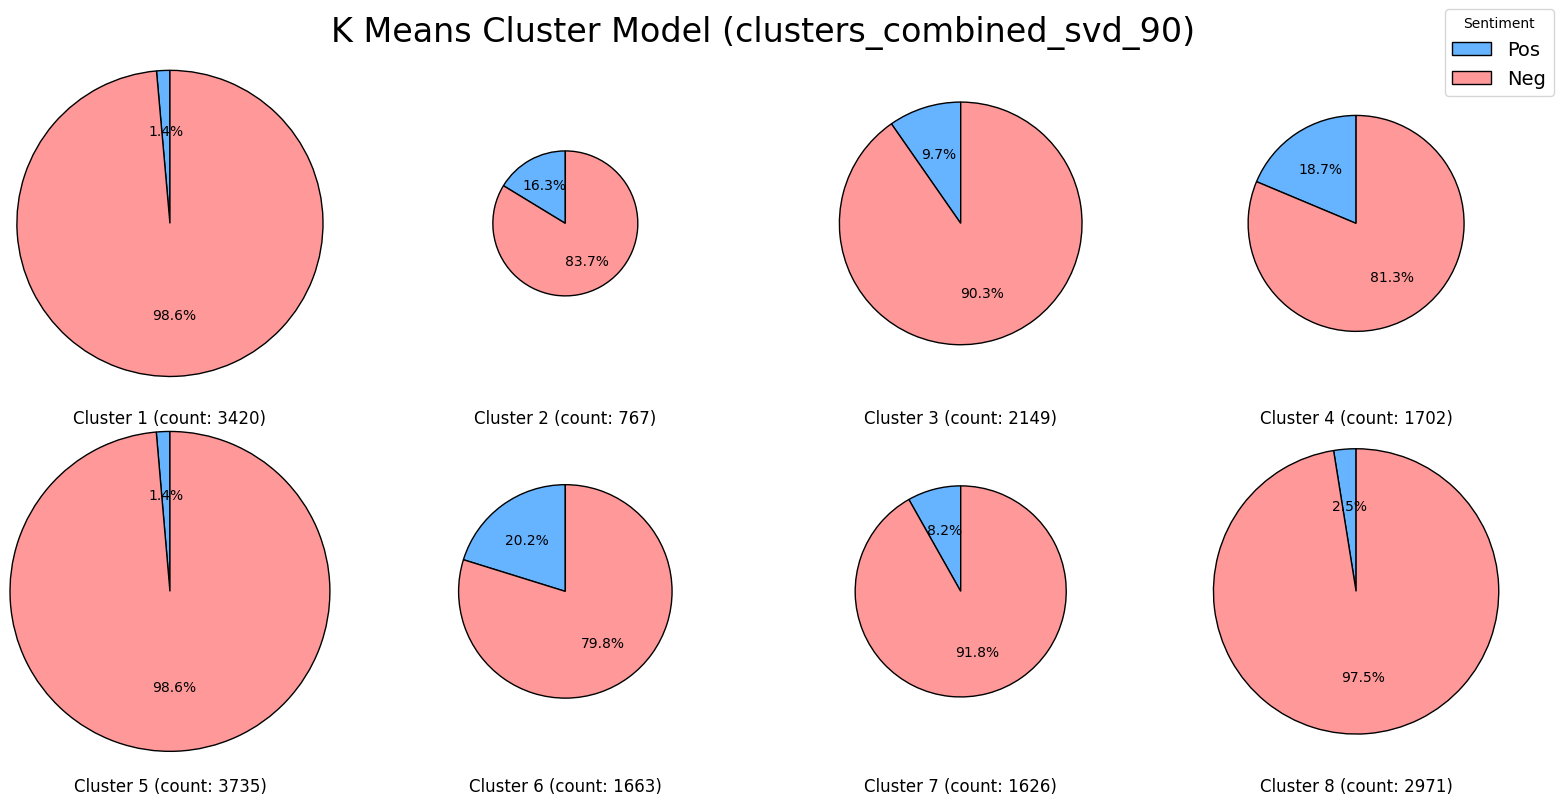

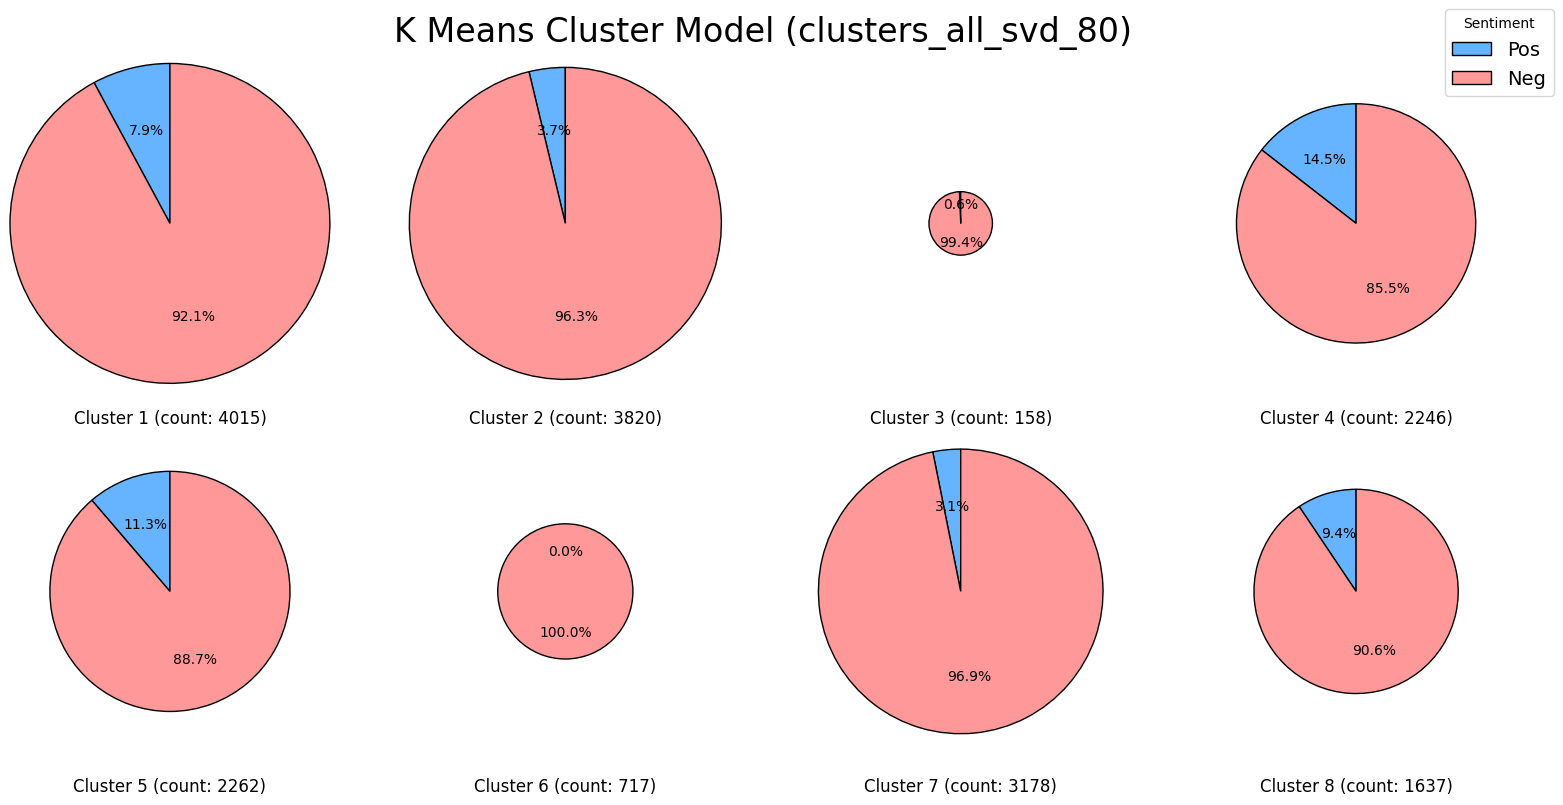

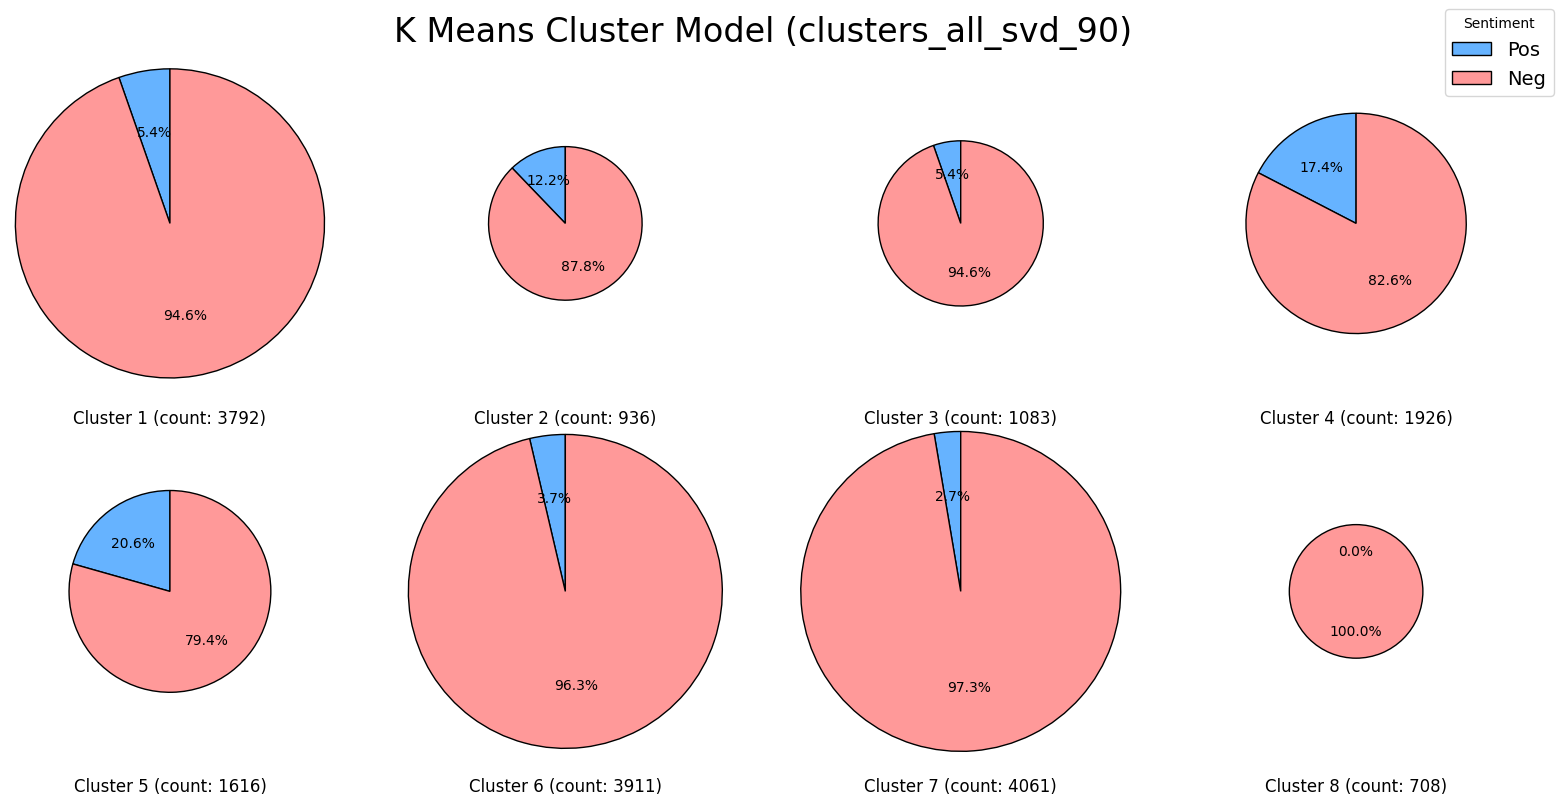

In [59]:
##############################
##### Visualize clusters #####
##############################

for col in col_lst:
    cnts = [summary[col][k][2] for k in range(K)]
    max_cnt = max(cnts)
    radii = [np.sqrt(cnt / max_cnt) for cnt in cnts]

    fig, axes = plt.subplots(2, 4, figsize=(16, 8))
    axes = axes.flatten()

    labels = ['Pos', 'Neg']
    colors = ['#66b3ff', '#ff9999']
    legend_wedges = None

    for i, ax in enumerate(axes):
        pos = summary[col][i][0]
        neg = summary[col][i][1]
        
        # Plot Pie with dynamic radius
        wedges, _, _ = ax.pie([pos, neg], colors=colors, 
                                radius=radii[i], autopct='%1.1f%%', startangle=90,
                                wedgeprops={"edgecolor": "k", 'linewidth': 1})

        if i == 0:
            legend_wedges = wedges
        
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 1)
        ax.set_title(f'Cluster {i+1} (count: {cnts[i]})', y=-0.15)

    plt.suptitle(f"K Means Cluster Model ({col})", fontsize=24, y=0.98)
    fig.legend(legend_wedges, labels, loc='upper right', fontsize=14, title="Sentiment")
    plt.subplots_adjust(bottom=0.1, right=0.9, hspace=0.5, wspace=0.3)

    plt.tight_layout()
    plt.show()